# Income Prediction

#### The importance of census statistics
The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and solve existing problems. Statistical information, which serves as the basis for constructing planning forecasts, is essential for the democratic process since it enables the citizens to examine the decisions made by the government and local authorities, and decide whether they serve the public they are meant to help.

###### Read more: Use of Census Data

** *1. Categorical Attributes* **
 * **workclass**: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  -  Individual work category  
 * **education**: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  -  Individual's highest education degree  
 * **marital-status**: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  -  Individual marital status  
 * **occupation**: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  -  Individual's occupation  
 * **relationship**: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  -  Individual's relation in a family   
 * **race**: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  -  Race of Individual   
 * **sex**: (categorical) Female, Male.
 * **native-country**: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  -  Individual's native country   

** *2. Continuous Attributes* **
 * **age**: continuous.
  -  Age of an individual  
 * **education-num**: number of education year, continuous.
  -  Individual's year of receiving education
 * **fnlwgt**: final weight, continuous. 
 * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.
 * **capital-gain**: continuous.
 * **capital-loss**: continuous.
 * **hours-per-week**: continuous.
  -  Individual's working hour per week   

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
Train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, engine='python')

In [3]:
Test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, engine='python', header = None)

In [4]:
Train_data=Train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
Test_data = Test_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [5]:
Train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
Test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


 * As above we can see that there are '?' for some values. so we have to replace them to null values

In [7]:
# Columns name we can find from data description 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 
              'capital_gain', 'capital_loss', 'hours_per_week',
              'native_country', 'wage_class']

#setting the columns name of the dataframe
Train_data.columns = col_labels
Test_data.columns = col_labels

In [8]:
# Checking data types and total values for each column
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Checking data types and total values for each column
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


* From above we can see that null values are not available but instead of that ' ?' is available. So we have to handle that.

In [10]:
# replacing ' ?' with np.nan
Train_data.replace('?',np.nan, inplace=True)
# top 5 rows of training set data frame
Train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
Test_data.replace('?', np.nan, inplace=True)
Test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
# Checking shape of datasets
print('Shape of train set: ', Train_data.shape)
print('Shape of test set: ', Test_data.shape)

Shape of train set:  (32561, 15)
Shape of test set:  (16281, 15)


In [13]:
# Checking percentage of null values for Train set
(Train_data.isnull().sum()/32561)*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790486
wage_class        0.000000
dtype: float64

In [14]:
# Checking percentage of null values for Test set
(Test_data.isnull().sum()/16281)*100

age               0.000000
workclass         5.914870
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.933296
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.682943
wage_class        0.000000
dtype: float64

* In train and test datasets, null values are available in 'workclass', 'occupation' and 'native_country'. These three columns are categorical columns. 

In [15]:
# CategoricalImputer substituting null values with the most frequent value in that column
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [16]:
# In train dataset only three categorical columns have null values so fit imputer on them
Train_data['workclass']=imputer.fit_transform(Train_data['workclass'])
Train_data['occupation']=imputer.fit_transform(Train_data['occupation'])
Train_data['native_country']=imputer.fit_transform(Train_data['native_country'])

In [17]:
# In test dataset only three categorical columns have null values so fit imputer on them
Test_data['workclass']=imputer.fit_transform(Test_data['workclass'])
Test_data['occupation']=imputer.fit_transform(Test_data['occupation'])
Test_data['native_country']=imputer.fit_transform(Test_data['native_country'])

In [18]:
# Checking again after imputation
Train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [19]:
# Checking again after imputation
Test_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

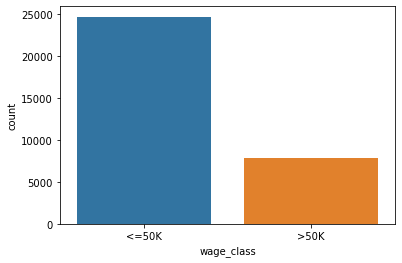

In [21]:
# Checking count of wage_class
sns.countplot(Train_data['wage_class'])

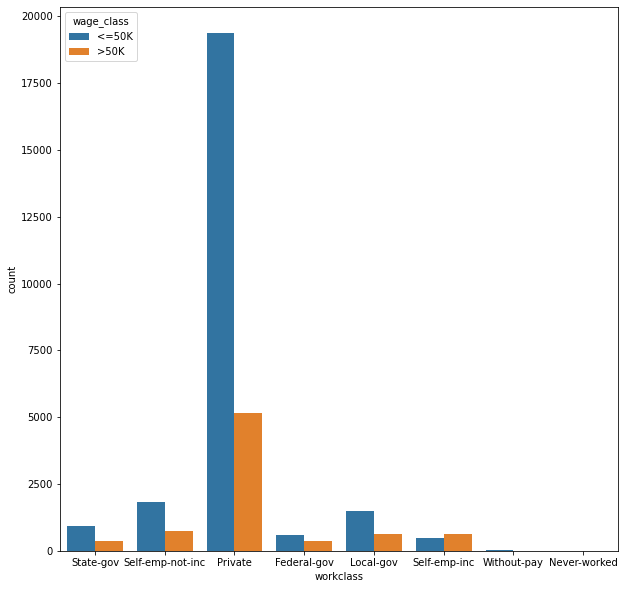

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(Train_data['workclass'], hue=Train_data['wage_class'])

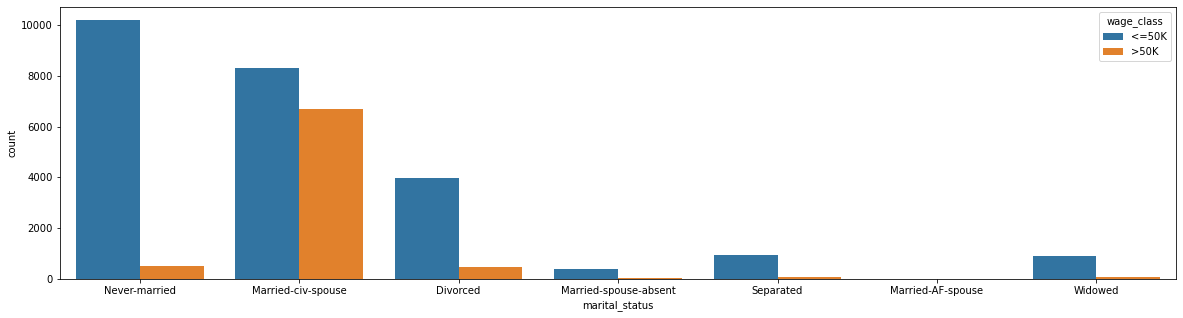

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(Train_data['marital_status'], hue=Train_data['wage_class'])

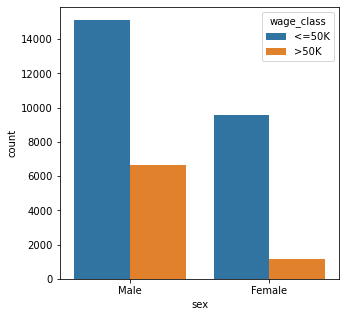

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(Train_data['sex'], hue=Train_data['wage_class'])

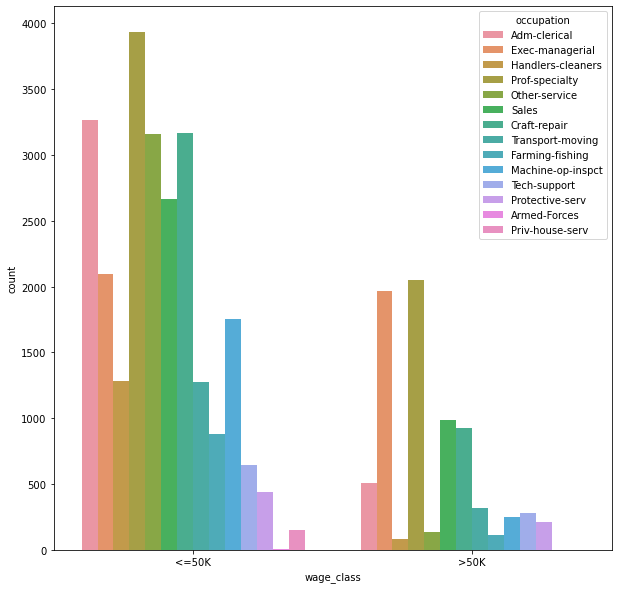

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(Train_data['wage_class'], hue=Train_data['occupation'])

In [32]:
# The education column has a corresponding education-num column 
Train_data.drop(columns=['education_num'] ,inplace=True)

In [33]:
Test_data.drop(columns=['education_num'], inplace=True)

In [34]:
print(Train_data.shape," ", Test_data.shape)

(32561, 14)   (16281, 14)


In [35]:
# Extracting categorical columns
Train_categorical_col = Train_data.select_dtypes(include=['object']).copy()

In [36]:
Test_categorical_col = Test_data.select_dtypes(include=['object']).copy()

In [37]:
Train_categorical_col.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object')

In [38]:
Test_categorical_col.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object')

In [39]:
# Checking for unique values for each categorical column 
for col in Train_categorical_col:
    print(col,":  ", Train_data[col].unique())
    print()
    print()

workclass :   ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


education :   ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


marital_status :   ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation :   ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


relationship :   ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


race :   ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


sex :   ['Male' 'Female']


native_country :   ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Ric

In [40]:
# Checking for unique values for each categorical column 
for col in Test_categorical_col:
    print(col,":  ", Test_data[col].unique())
    print()
    print()

workclass :   ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


education :   ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


marital_status :   ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation :   ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']


relationship :   ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


race :   ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


sex :   ['Male' 'Female']


native_country :   ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ir

 * We can see that there is some value(Holand-Netherlands) for native_country present in training dataset but not present in testing dataset.
 
 There are 42 countries in total, so it's better if we transform the feature by bucketing them across continent and drop native_country column itself

In [41]:
categories_dict = {"United-States":"North America","Mexico":"North America","Philippines":"Asia","Germany":"Europe","Canada":"North America","Puerto-Rico":"Central America","El-Salvador":"Central America","India":"Asia","Cuba":"Central America","England":"Europe","Jamaica":"Central America","South":"Asia","China":"Asia","Italy":"Europe","Dominican-Republic":"Central America","Vietnam":"Asia","Guatemala":"Central America","Japan":"Asia","Poland":"Europe","Columbia":"South America","Taiwan":"Asia",
"Haiti":"Central America","Iran":"Asia","Portugal":"Europe","Nicaragua":"Central America","Peru":"South America","Greece":"Europe","France":"Europe","Ecuador":"South America","Ireland":"Europe","Hong":"Asia","Cambodia":"Asia","Trinadad&Tobago":"Central America","Laos":"Asia","Thailand":"Asia","Yugoslavia":"Europe","Outlying-US(Guam-USVI-etc)":"North America","Honduras":"Central America","Hungary":"Europe","Scotland":"Europe","Holand-Netherlands":"Europe"}
Train_categorical_col['Continent'] = Train_categorical_col['native_country'].map(categories_dict)
Test_categorical_col['Continent'] = Test_categorical_col['native_country'].map(categories_dict)


In [42]:
Train_categorical_col = Train_categorical_col.drop(['native_country'],axis=1)
Test_categorical_col = Test_categorical_col.drop(['native_country'],axis=1)

In [43]:
Train_categorical_col.head()

,workclass,education,marital_status,occupation,relationship,race,sex,wage_class,Continent
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K,North America
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K,North America
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K,North America
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K,North America
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K,Central America


In [44]:
# categorical columns to numerical columns using dummy encoding
# for col in Train_categorical_col.drop('wage_class', axis=1).columns:
#      Train_categorical_col = pd.get_dummies(Train_categorical_col, columns=[col], prefix=[col], drop_first=True)
Train_categorical_col = pd.get_dummies(Train_categorical_col, columns=['workclass','education','marital_status','occupation','relationship','race','sex',"Continent"],drop_first=True)
Test_categorical_col = pd.get_dummies(Test_categorical_col, columns=['workclass','education','marital_status','occupation','relationship','race','sex',"Continent"],drop_first=True)

In [45]:
print(Train_categorical_col.shape)
print()
Train_categorical_col.head()

(32561, 56)



,wage_class,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America
0,<=50K,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,<=50K,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,<=50K,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,<=50K,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,<=50K,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [47]:
print(Test_categorical_col.shape)
print()
Test_categorical_col.head()

(16281, 56)



,wage_class,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America
0,<=50K.,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,<=50K.,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,>50K.,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,>50K.,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,<=50K.,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
Train_categorical_col['wage_class'] = Train_categorical_col['wage_class'].map({'<=50K':0, '>50K':1})

In [49]:
Test_categorical_col['wage_class'] = Test_categorical_col['wage_class'].map({'<=50K.':0, '>50K.':1})

In [50]:
Test_categorical_col.head()

,wage_class,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


 * We have converted all categorical columns for training dataset

In [51]:
# Extracting numerical columns
Train_num_col = Train_data.select_dtypes(include=['int64']).copy()

In [52]:
Train_num_col.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40


In [53]:
Test_num_col = Test_data.select_dtypes(include=['int64']).copy()

In [54]:
Test_num_col.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,25,226802,0,0,40
1,38,89814,0,0,50
2,28,336951,0,0,40
3,44,160323,7688,0,40
4,18,103497,0,0,30


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
std_scaler = StandardScaler()

In [57]:
scaled_train_num = std_scaler.fit_transform(Train_num_col)

In [58]:
scaled_test_num = std_scaler.fit_transform(Test_num_col)

In [59]:
print(scaled_train_num.shape," ", scaled_test_num.shape)

(32561, 5)   (16281, 5)


In [60]:
scaled_train_num_df = pd.DataFrame(data=scaled_train_num, columns = Train_num_col.columns)

In [61]:
scaled_test_num_df = pd.DataFrame(data=scaled_test_num, columns=Test_num_col.columns)

In [62]:
print(scaled_train_num_df.shape," ", scaled_test_num_df.shape)

(32561, 5)   (16281, 5)


In [63]:
scaled_train_num_df.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,-0.145920,-0.21666,-0.035429


In [64]:
scaled_test_num_df.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,-0.994129,0.353474,-0.142662,-0.218062,-0.031432
1,-0.055417,-0.942391,-0.142662,-0.218062,0.769918
2,-0.777503,1.395450,-0.142662,-0.218062,-0.031432
3,0.377835,-0.275397,0.871091,-0.218062,-0.031432
4,-1.499590,-0.812954,-0.142662,-0.218062,-0.832781


In [65]:
final_train = pd.concat([scaled_train_num_df, Train_categorical_col], axis=1)

In [66]:
final_train.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,wage_class,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America
0,0.030671,-1.063611,0.148453,-0.21666,-0.035429,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0.837109,-1.008707,-0.145920,-0.21666,-2.222153,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,-0.042642,0.245079,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,1.057047,0.425801,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,-0.775768,1.408176,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0


In [67]:
final_test = pd.concat([scaled_test_num_df,Test_categorical_col], axis=1)
final_test.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,wage_class,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America
0,-0.994129,0.353474,-0.142662,-0.218062,-0.031432,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,-0.055417,-0.942391,-0.142662,-0.218062,0.769918,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
2,-0.777503,1.395450,-0.142662,-0.218062,-0.031432,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0.377835,-0.275397,0.871091,-0.218062,-0.031432,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,-1.499590,-0.812954,-0.142662,-0.218062,-0.832781,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [68]:
X_train = final_train.drop('wage_class', axis=1)
y_train = final_train['wage_class']

In [69]:
X_test = final_test.drop('wage_class', axis=1)
y_test = final_test['wage_class']

In [70]:
print(X_train.shape," ",X_test.shape)

(32561, 60)   (16281, 60)


#### Gaussian Naive Baye

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
gaussionNB  = GaussianNB(priors=None, var_smoothing=0.05)
gaussionNB.fit(X_train, y_train)

GaussianNB(var_smoothing=0.05)

In [72]:
y_pred = gaussionNB.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_accuracy

0.8068914685830109

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}

In [77]:
grid = GridSearchCV(estimator=gaussionNB, param_grid=param_grid, cv=5, verbose=3 )

In [78]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.589, total=   0.1s
[CV] var_smoothing=1e-09 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................. var_smoothing=1e-09, score=0.585, total=   0.1s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.589, total=   0.1s
[CV] var_smoothing=1e-09 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................. var_smoothing=1e-09, score=0.580, total=   0.1s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.580, total=   0.1s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.824, total=   0.1s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.824, total=   0.1s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.831, total=   0.1s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.832, total=   0.1s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.832, total=   0.1s
[CV] var_smoothing=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    6.9s finished


GridSearchCV(cv=5, estimator=GaussianNB(var_smoothing=0.05),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [79]:
grid.best_estimator_

GaussianNB(var_smoothing=0.1)

In [80]:
gaussionNB  = GaussianNB(priors=None, var_smoothing=0.1)
gaussionNB.fit(X_train, y_train)

GaussianNB(var_smoothing=0.1)

In [81]:
y_pred = gaussionNB.predict(X_test)

In [82]:
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_accuracy

0.8282046557336773

 * Above grid search improves accuracy and give stable model.

#### Logistic Regression

In [83]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

C:\Users\Tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [84]:
y_predLg = log_model.predict(X_test)

In [85]:
lg_accuracy = accuracy_score(y_test, y_predLg)
lg_accuracy

0.8507462686567164

#### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rndforest =RandomForestClassifier()
rndforest.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
y_predRnd = rndforest.predict(X_test)

In [89]:
rnd_accuracy = accuracy_score(y_test,y_predRnd)
rnd_accuracy

0.8489036299981574

#### xgboost

In [90]:
from xgboost import XGBClassifier

In [120]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
y_predXgb = xgb.predict(X_test)

In [122]:
accuracy_xgb = accuracy_score(y_test, y_predXgb)
accuracy_xgb

0.8619863644739266

 #### K-Nearest Neighbour

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [130]:
y_predKnn = knn.predict(X_test)

In [131]:
accuracy_knn = accuracy_score(y_test, y_predKnn)
accuracy_knn

0.8310300350101345

#### Accuracy score:
 
             Gaussian Naive Baye - 0.8282046557336773
             
             Logistic Regression - 0.8507462686567164
             
             Random Forest - 0.8489036299981574
             
             xgboost - 0.8619863644739266
             
             K-Nearest Neighbour - 0.8310300350101345
 

#### So, the accuracy score using XGB Classifier is 86.19% which is good and found to be best classifiers for dataset.